<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

#df.head()
df

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588
...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.105150
36787,2016,0.9,3.0,246.000000,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.108155
36788,2016,0.9,3.0,255.000000,Coches pequeños,dos,Manual,Premium,muy pequeño,muy bajo,muy bajo,0.111336
36789,2017,0.9,3.0,248.000000,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.108155


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3. Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
# 1

# crear datafrane con solo variables numéricas

df_num = df.drop(df.filter(regex='tipo'), axis=1)
display(df_num.head())
print("Cantidad de datos nulos: ")
df_num.isnull().sum(axis = 0)

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


Cantidad de datos nulos: 


year                    0
desplazamiento          2
cilindros               3
co2                     0
consumo_litros_milla    0
dtype: int64

In [4]:
# rellenar con el promedio de la columna en celdas vacías

columnas = df_num.columns
[df_num[col].fillna(value = df[col].mean(), inplace = True) for col in columnas]
print("Cantidad de datos nulos: ")
df_num.isnull().sum(axis = 0)

Cantidad de datos nulos: 


year                    0
desplazamiento          0
cilindros               0
co2                     0
consumo_litros_milla    0
dtype: int64

In [5]:
# normalizar usando MinMaxScaler
scaler = MinMaxScaler()
columns = df_num.columns
df_num[columns] = scaler.fit_transform(df[columns])

df_num

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


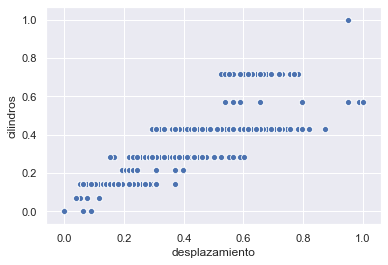

In [6]:
# inspeccion mediante grafico 2D para dos columnas 
ax = sns.scatterplot( data=df_num,x="desplazamiento", y="cilindros")

In [7]:
#2 

# crear conjunto con solo variables categóricas

df_cat = df.filter(regex='tipo')
df_cat.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [8]:
# usar get_dummies (creo que el enunciado dice hacer lo inverso de lo que hace la función)

df_cat = pd.get_dummies(df_cat)
df_cat

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Básicamente toma todas las entradas __únicas__ de cada columna (de valores categóricos) en el dataframe original y las convierte en nuevas columnas rellenando en cada fila con 1 si es que el dato (cada entrada de las filas) pertenece a esa categoría y con 0 si es que no.

In [9]:
# juntar datos numéricos y categóricos dummyficados

df_procesado = pd.concat([df_num,df_cat], axis = 1, sort= False).fillna(0)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [10]:
# 1

kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)

centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

centroids[1]

array([ 4.38150232e-01,  1.59493454e-01,  1.41148896e-01,  2.42291222e-01,
        1.56497403e-01,  1.64071190e-02,  1.25139043e-01,  6.39599555e-03,
        9.28809789e-02,  7.09677419e-01,  3.64293660e-02,  2.22469410e-03,
        1.08453838e-02,  4.39377086e-02,  9.56062291e-01,  7.21644966e-15,
        1.00000000e+00, -7.80625564e-17,  8.08954394e-01,  5.33926585e-02,
        1.37652948e-01,  4.13558077e-15, -9.88098492e-15,  1.15463195e-14,
        7.97552836e-01,  2.02169077e-01,  6.74460487e-15, -1.20459198e-14,
        1.70974346e-14,  1.25732758e-14,  1.00000000e+00,  9.65894031e-15,
        2.78086763e-03,  1.39043382e-03, -7.13318293e-15,  9.95828699e-01])

In [11]:
# 2

df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
display(df_procesado.head())

centroids_df = pd.DataFrame(centroids, columns=df_procesado.columns.drop('cluster'))
centroids_df["cluster"] = np.arange(1,9)

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4


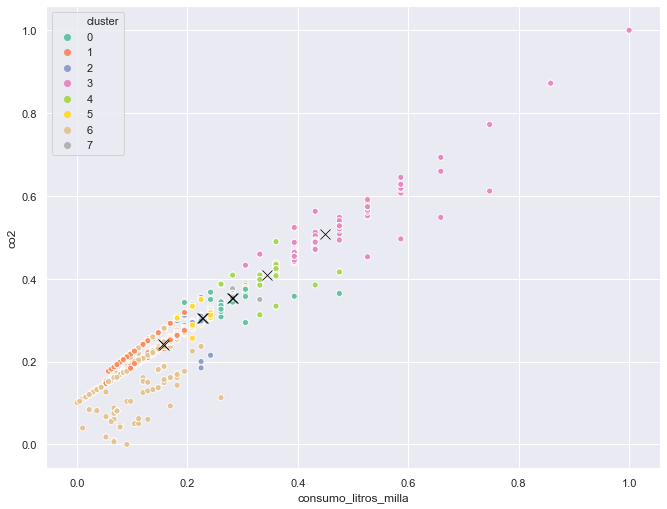

In [12]:
# test en 2D para ver si se alcanzan a ver los clusters para dos columnas
fig, ax = plt.subplots(figsize=(11, 8.5))

sns.scatterplot( data=df_procesado,
                     x="consumo_litros_milla",
                     y="co2",
                     hue="cluster",
                     legend='full',
                     palette="Set2")

sns.scatterplot(x="consumo_litros_milla", y="co2",
                     s=100, color="black", marker="x",
                     data=centroids_df)

In [13]:
# 3

df_aux = df_procesado.drop(df_procesado.filter(regex='_tipo'), axis=1)
medias = df_aux.groupby('cluster').mean()
moda = df_aux.groupby('cluster').apply(lambda x: x.mean()).drop('cluster', axis =1)
display(medias)
display(moda)
print("***Recordar que estos datos han sido normalizados según el criterio MinMaxScale***")

,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,0.408220,0.334073,0.258246,0.354263,0.281382
1,0.438150,0.159493,0.141149,0.242291,0.156497
2,0.695849,0.279278,0.234357,0.304941,0.227602
3,0.412029,0.576144,0.420152,0.506926,0.449643
4,0.478341,0.450961,0.327433,0.410032,0.343311
5,0.448596,0.236512,0.176543,0.304247,0.226326
6,0.690408,0.180711,0.151379,0.240315,0.156763
7,0.586260,0.362143,0.299692,0.354258,0.282449


,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,0.408220,0.334073,0.258246,0.354263,0.281382
1,0.438150,0.159493,0.141149,0.242291,0.156497
2,0.695849,0.279278,0.234357,0.304941,0.227602
3,0.412029,0.576144,0.420152,0.506926,0.449643
4,0.478341,0.450961,0.327433,0.410032,0.343311
5,0.448596,0.236512,0.176543,0.304247,0.226326
6,0.690408,0.180711,0.151379,0.240315,0.156763
7,0.586260,0.362143,0.299692,0.354258,0.282449


***Recordar que estos datos han sido normalizados según el criterio MinMaxScale***


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [14]:
# implementación de la regla del codo
# advertencia: se requieren moderadamente altos recursos computacionales en esta celda

Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow



,Number of Clusters,Score
0,5,127110.277865
1,10,84042.447098
2,20,67312.482051
3,30,56943.915964
4,50,44933.824191
5,75,36866.938486
6,100,31227.082633
7,200,18019.042682
8,300,11442.103395


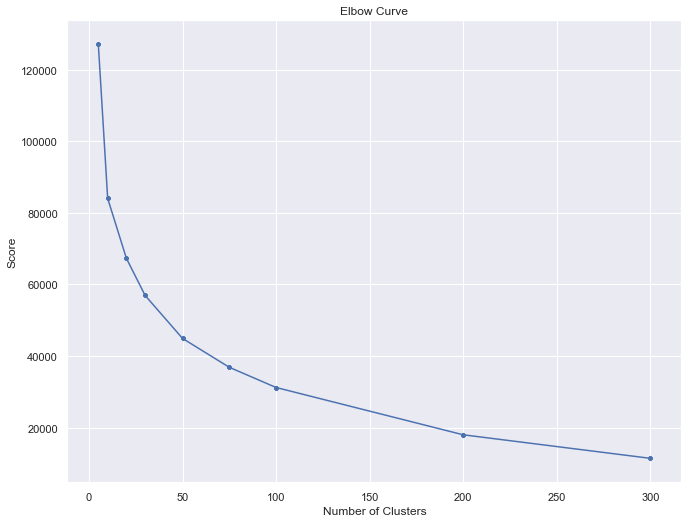

In [15]:
# graficar los datos etiquetados con k-means

fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)


Se aprecia que la pendiente descendiendo entre 5 y 10 clusters es la más pronunciada, por lo que el número óptimo de clusters sería 10.

_Algo que falto realizar:_ experimentar que sucede si se toman los años de los vehículos como datos categóricos en vez de numéricos.